# Initial Exploratory Data Analysis (EDA)

In [1]:
#Reading in packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
import statsmodels as sm
import pylab as py
import scipy.stats as stats
import scipy as sp
import statsmodels.formula.api as smf
import sklearn
from plotnine import *
from sklearn.linear_model import LinearRegression
from statsmodels.genmod.generalized_linear_model import GLM
from scipy.stats import spearmanr

In [2]:
#Reading in data
all_wine = pd.read_csv("/Users/madisongosnell/Desktop/MSA Coding /Individual Project/all_wine.csv")

In [ ]:
#Looking at the first 10 observations
all_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,White
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,White


In [ ]:
#General information about the variables
all_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Wine Type
Red      8.319637
White    6.854788
Name: fixed acidity, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 87'. Pick better value with 'binwidth'.


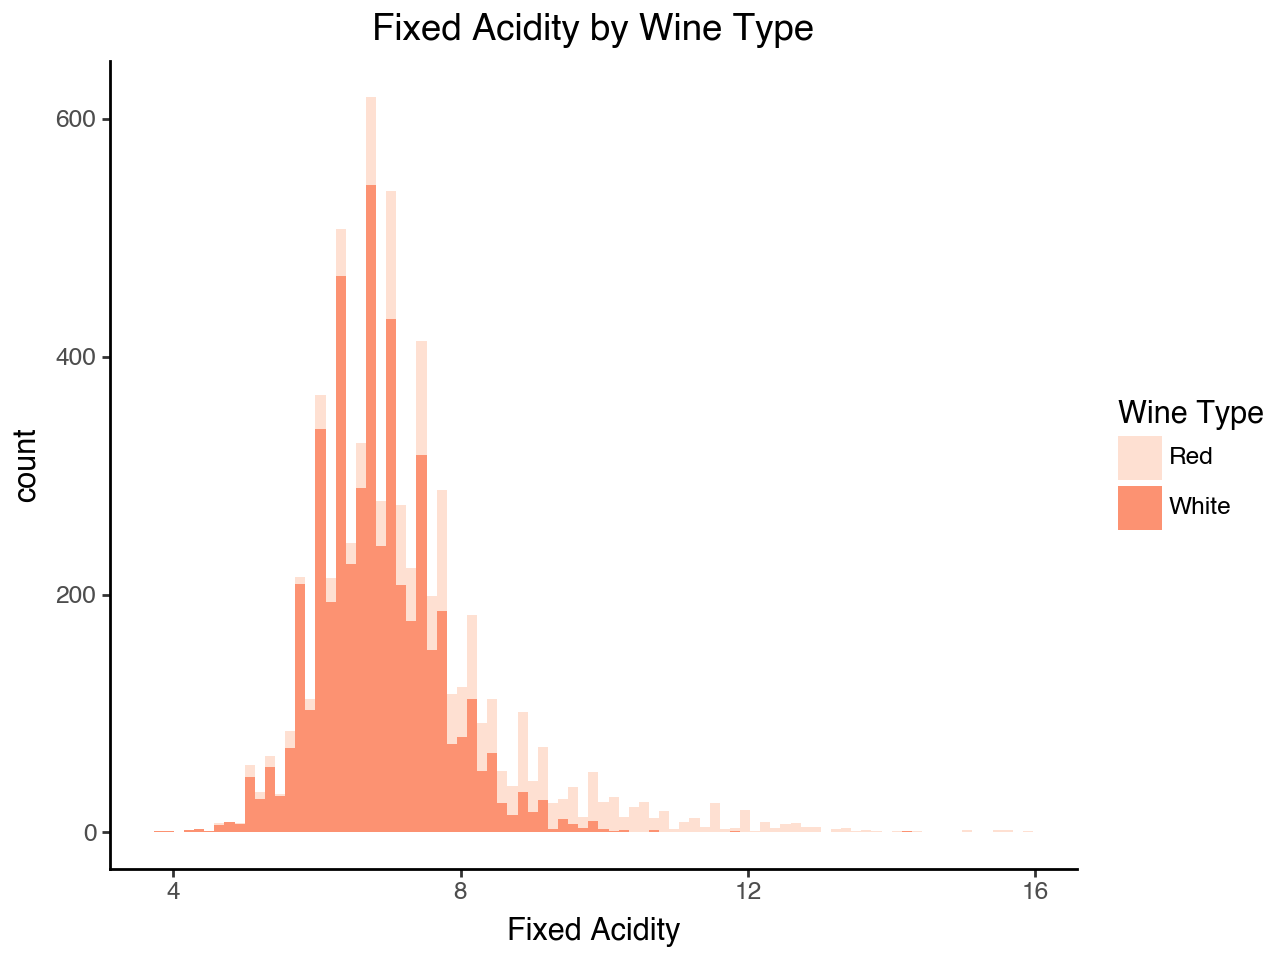

In [28]:
#Grouping data by wine type and visualizing different variable characteristics

#Grouping by wine type and looking at fixed acidity
fixed_acidity_grouped = all_wine.groupby("Wine Type")["fixed acidity"].mean()
print(fixed_acidity_grouped)

#Plotting 
p = (
    ggplot(all_wine,aes(x="fixed acidity", fill="Wine Type")) + 
    geom_histogram()+
    labs(x="Fixed Acidity", title="Fixed Acidity by Wine Type", fill="Wine Type")+
    theme_classic()+
    scale_fill_brewer(palette="Reds")
)
p.show()
#Red Wine seems to have higher fixed acidity typically 
#A lot of wines seem to have a fixed acidity around 7

Wine Type
Red       46.467792
White    138.360657
Name: total sulfur dioxide, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 52'. Pick better value with 'binwidth'.


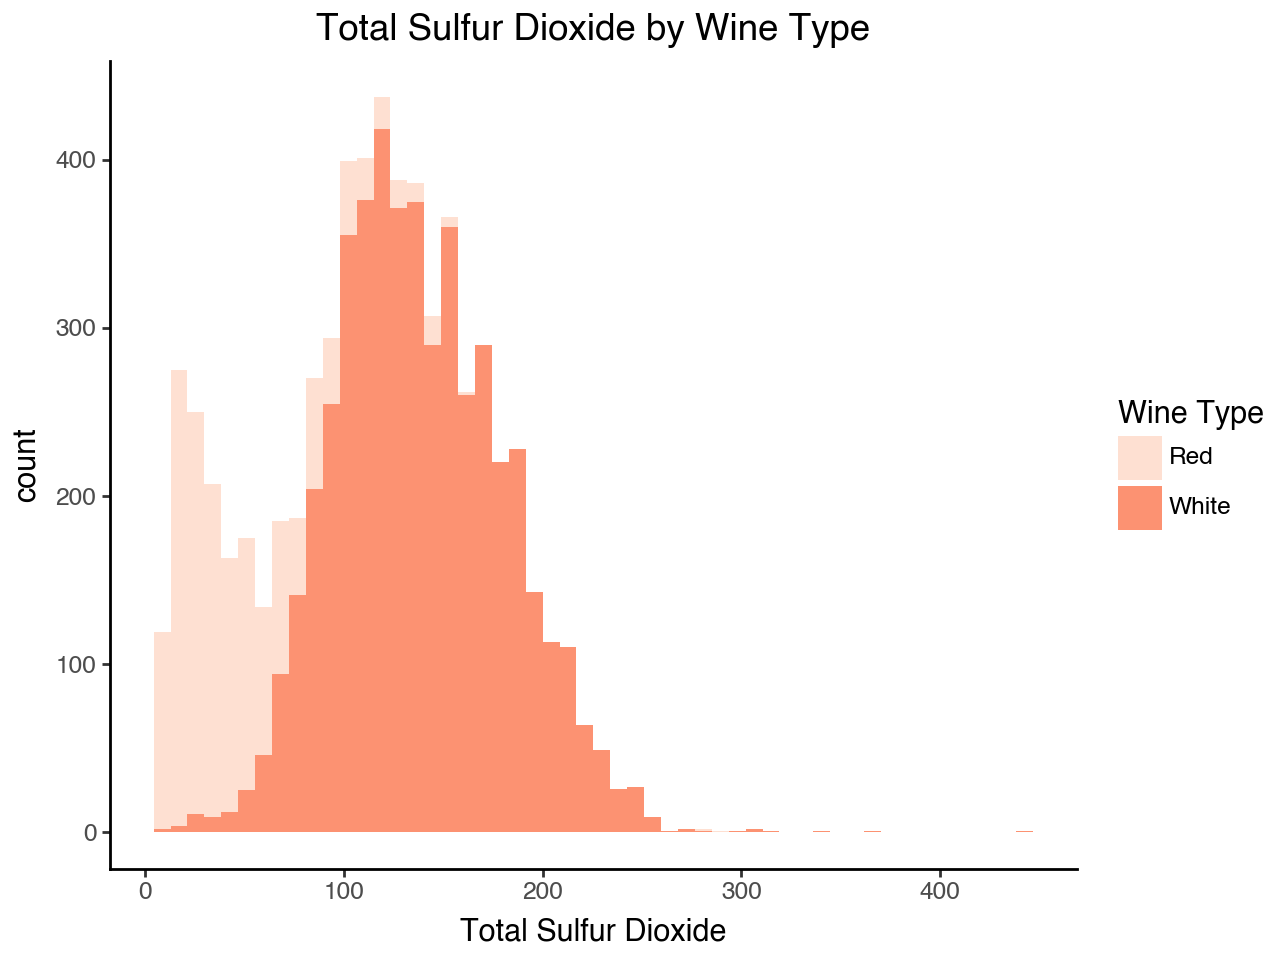

Wine Type
Red      283.0
White    431.0
Name: total sulfur dioxide, dtype: float64


In [25]:
#Grouping by wine type and looking at total sulfur dioxide
sulfur_dioxide_grouped = all_wine.groupby("Wine Type")["total sulfur dioxide"].mean()
print(sulfur_dioxide_grouped)

#Plotting 
p = (
    ggplot(all_wine,aes(x="total sulfur dioxide", fill="Wine Type")) + 
    geom_histogram()+
    labs(x="Total Sulfur Dioxide", title="Total Sulfur Dioxide by Wine Type", fill="Wine Type")+
    theme_classic()+
    scale_fill_brewer(palette="Reds")
)
p.show()

#Red wines typically have a smaller total sulfur dioxide, and whites have larger

#Checking the range of wines
range_values = all_wine.groupby("Wine Type")["total sulfur dioxide"].apply(lambda x: x.max() - x.min())
print(range_values)
#White wine has a much larger range

Wine Type
Red      3.311113
White    3.188267
Name: pH, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 58'. Pick better value with 'binwidth'.


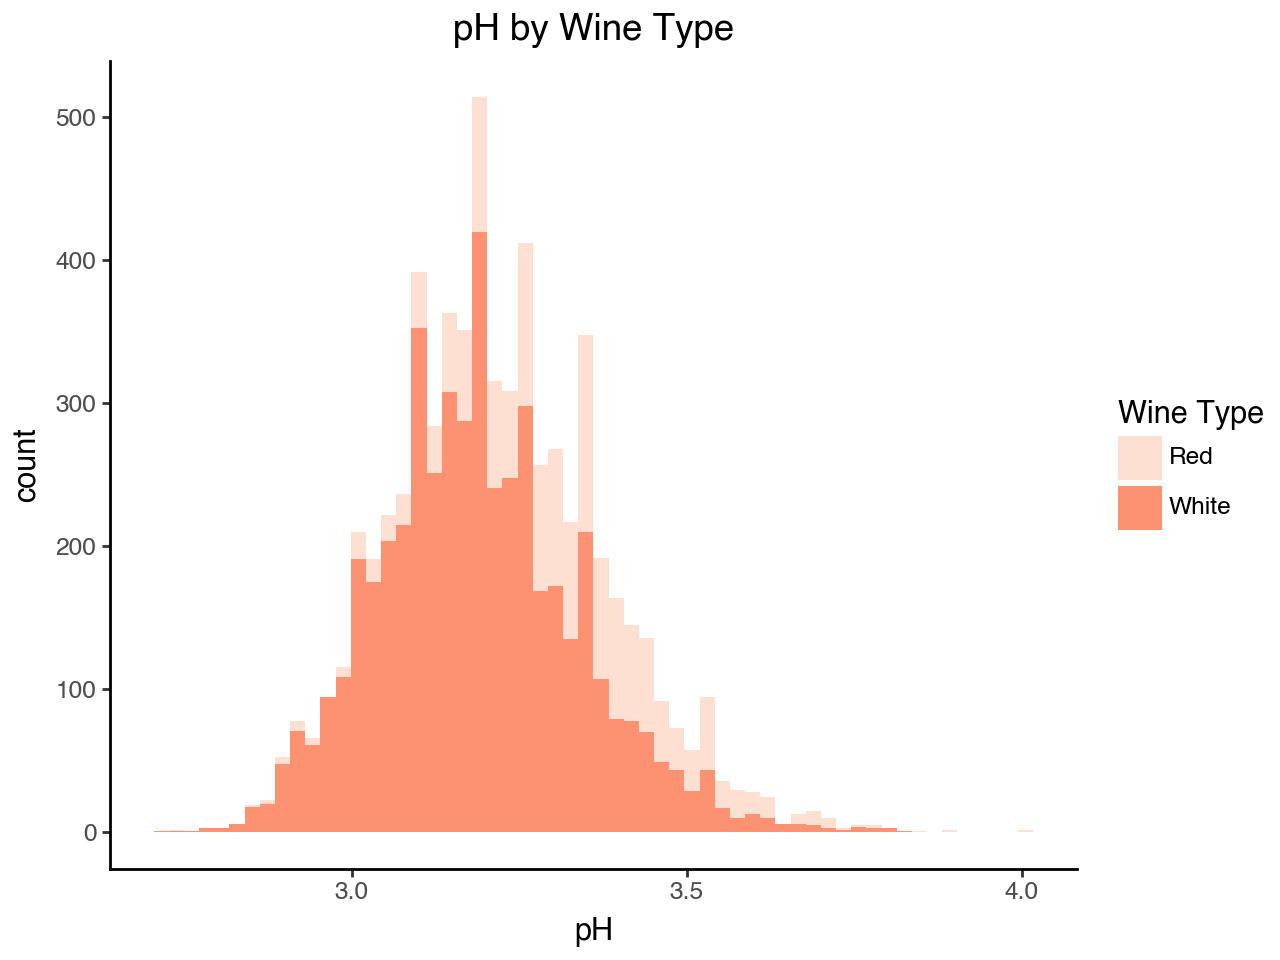

In [ ]:
#Grouping by wine type and looking at pH
pH_grouped = all_wine.groupby("Wine Type")["pH"].mean()
print(pH_grouped)

#Plotting 
p = (
    ggplot(all_wine,aes(x="pH", fill="Wine Type")) + 
    geom_histogram()+
    labs(x="pH", title="pH by Wine Type", fill="Wine Type")+
    theme_classic()+
    scale_fill_brewer(palette="Reds")
)
p.show()

#pH values are pretty much equivalent for white or red wine (around 3)

Wine Type
Red      10.422983
White    10.514267
Name: alcohol, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 36'. Pick better value with 'binwidth'.


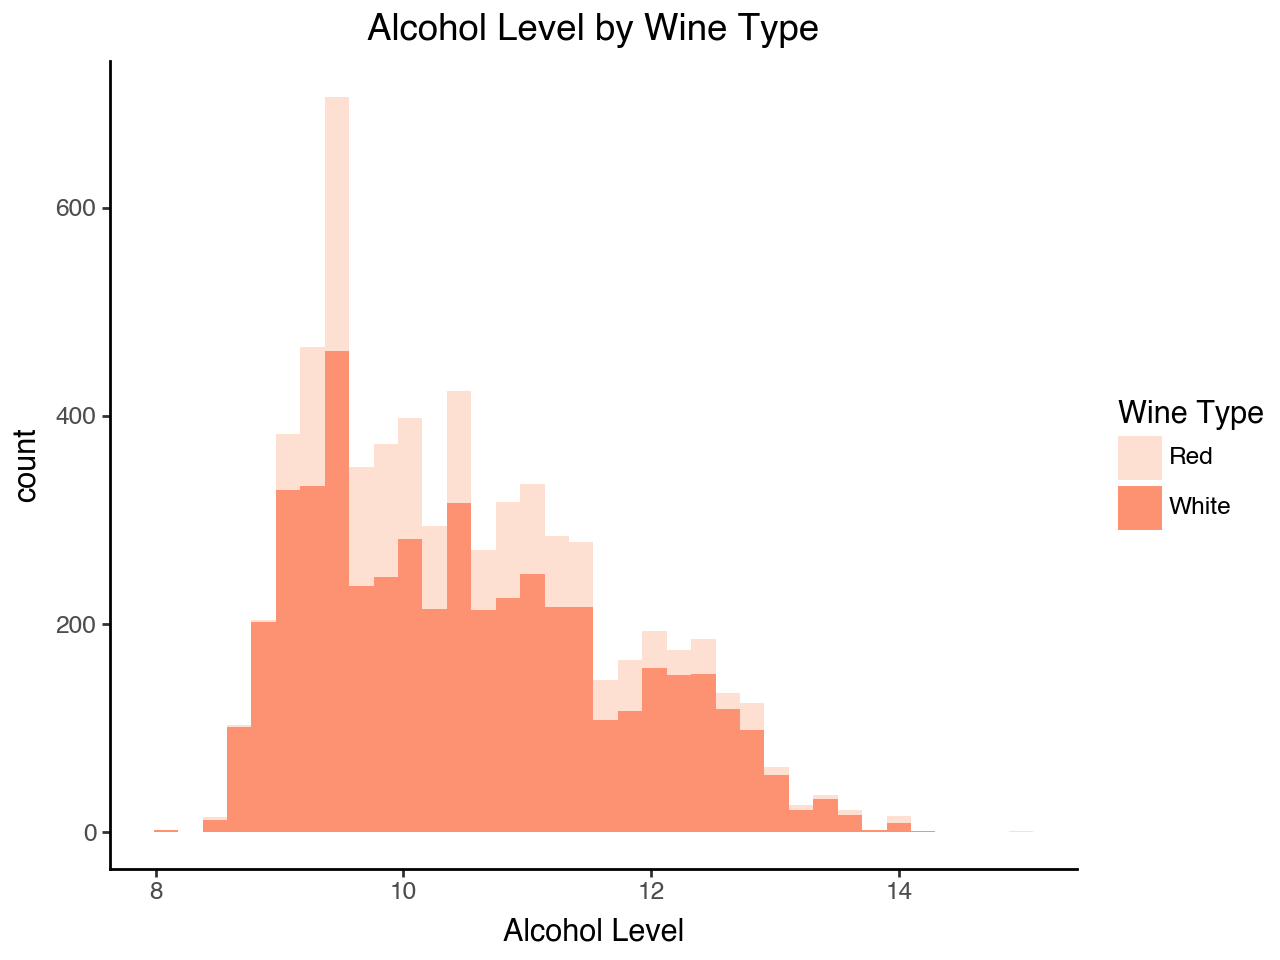

Wine Type
Red      6.5
White    6.2
Name: alcohol, dtype: float64


In [ ]:
#Grouping by wine type and looking at alcohol level
alcohol_grouped = all_wine.groupby("Wine Type")["alcohol"].mean()
print(alcohol_grouped)

#Plotting 
p = (
    ggplot(all_wine,aes(x="alcohol", fill="Wine Type")) + 
    geom_histogram()+
    labs(x="Alcohol Level", title="Alcohol Level by Wine Type", fill="Wine Type")+
    theme_classic()+
    scale_fill_brewer(palette="Reds")
)
p.show()

#Alcohol level mean relatively the same for red and white (around 10)

#Checking the range of wines
range_values = all_wine.groupby("Wine Type")["alcohol"].apply(lambda x: x.max() - x.min())
print(range_values)
#Pretty large range for both wines

Wine Type
Red      0.658149
White    0.489847
Name: sulphates, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 98'. Pick better value with 'binwidth'.


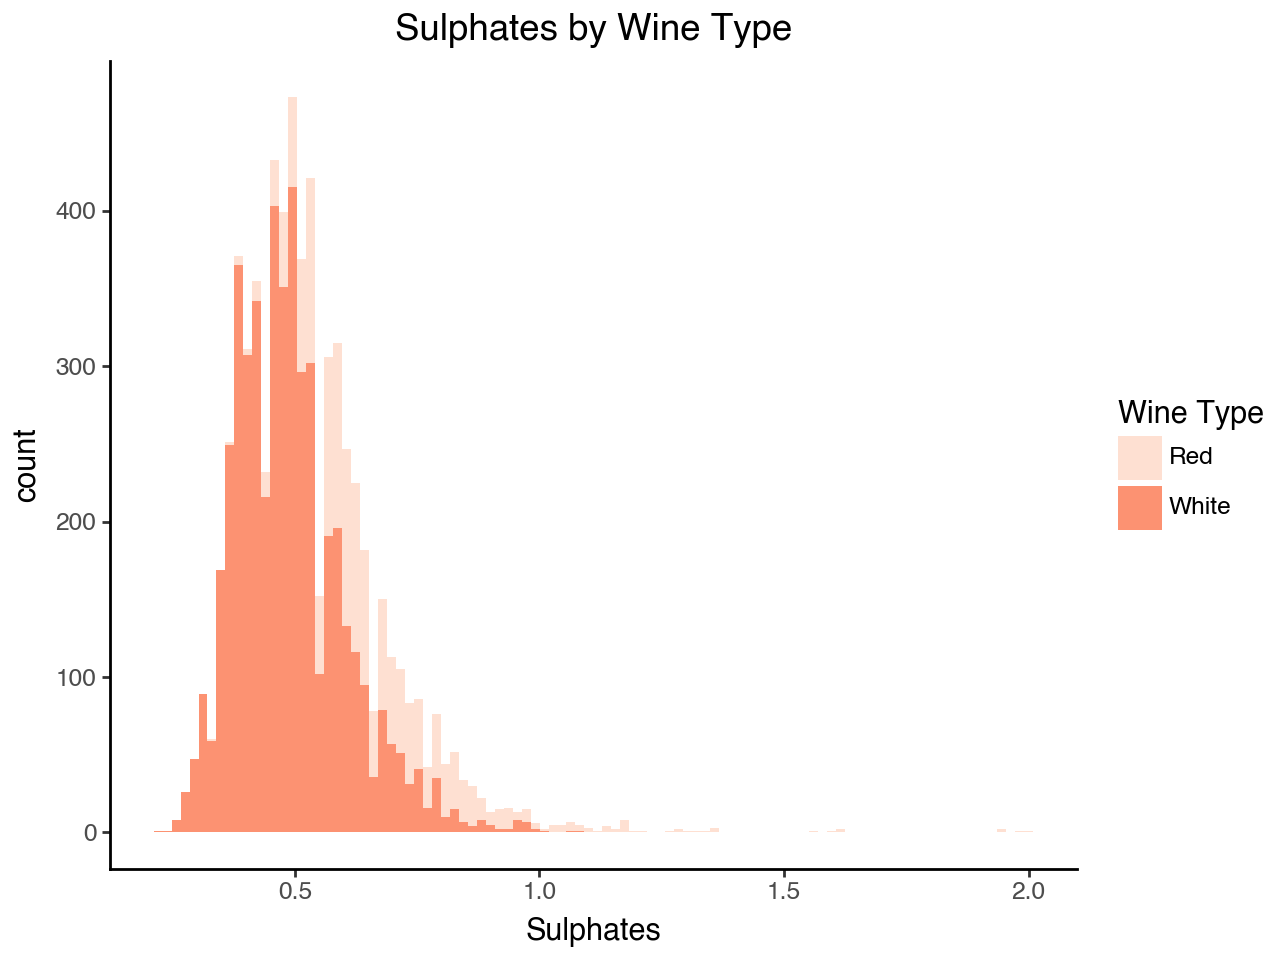

Wine Type
Red      1.67
White    0.86
Name: sulphates, dtype: float64


In [ ]:
#Grouping by wine type and looking at sulphates
sulphates_grouped = all_wine.groupby("Wine Type")["sulphates"].mean()
print(sulphates_grouped)

#Plotting 
p = (
    ggplot(all_wine,aes(x="sulphates", fill="Wine Type")) + 
    geom_histogram()+
    labs(x="Sulphates", title="Sulphates by Wine Type", fill="Wine Type")+
    theme_classic()+
    scale_fill_brewer(palette="Reds")
)
p.show()
#About the same pattern between red and white wine (value around 0.5)

#Checking the range of wines
range_values = all_wine.groupby("Wine Type")["sulphates"].apply(lambda x: x.max() - x.min())
print(range_values)
#Red wine has a much larger range in sulphates than white wine

Wine Type
Red      0.270976
White    0.334192
Name: citric acid, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 111'. Pick better value with 'binwidth'.


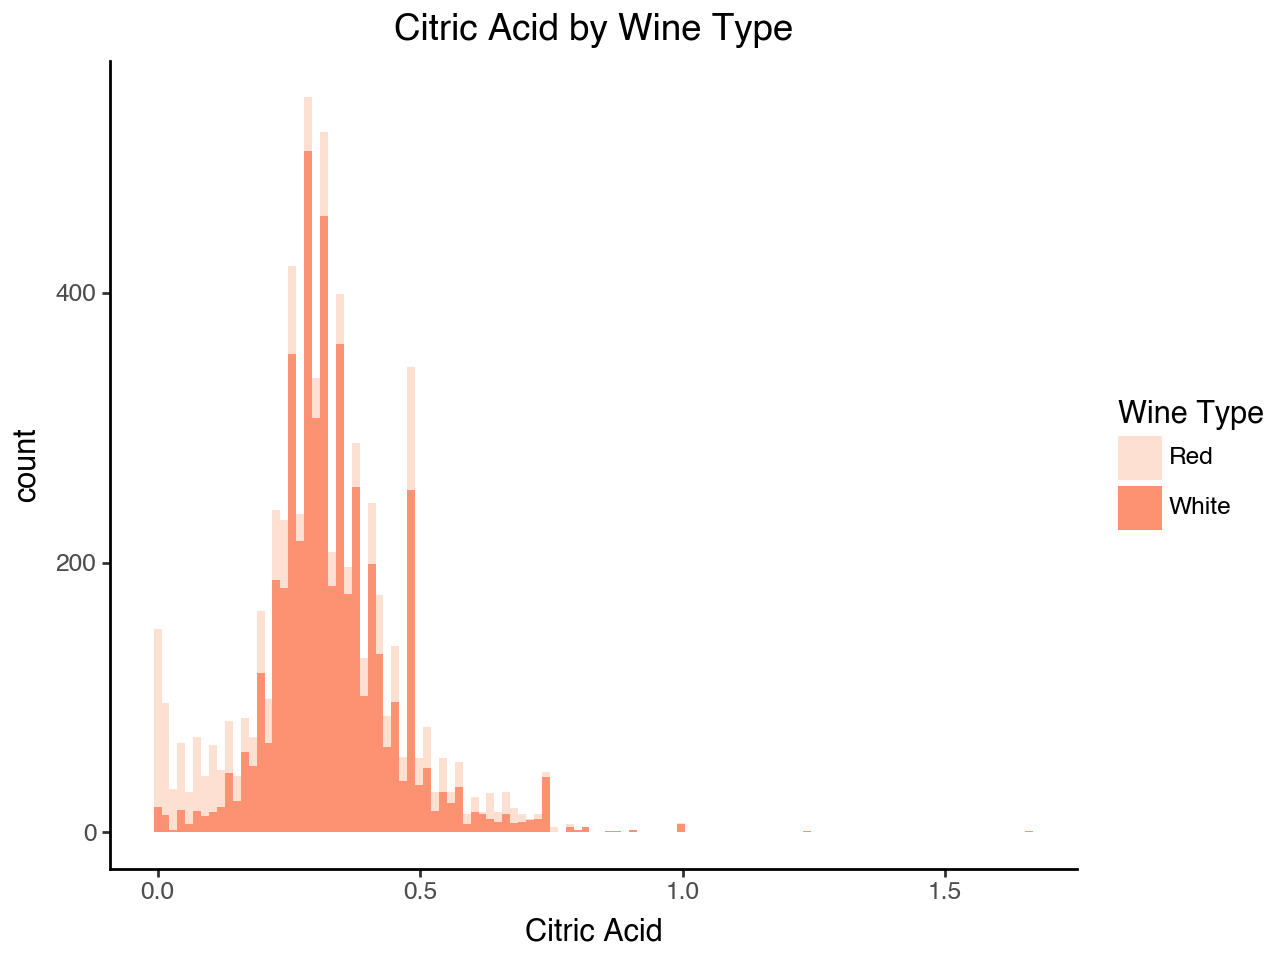

In [ ]:
#Grouping by wine type and looking at citric acid
citric_acid_grouped = all_wine.groupby("Wine Type")["citric acid"].mean()
print(citric_acid_grouped)

#Plotting 
p = (
    ggplot(all_wine,aes(x="citric acid", fill="Wine Type")) + 
    geom_histogram()+
    labs(x="Citric Acid", title="Citric Acid by Wine Type", fill="Wine Type")+
    theme_classic()+
    scale_fill_brewer(palette="Reds")
)
p.show()

#Citric acid levels relatively the same value (around 0.3)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

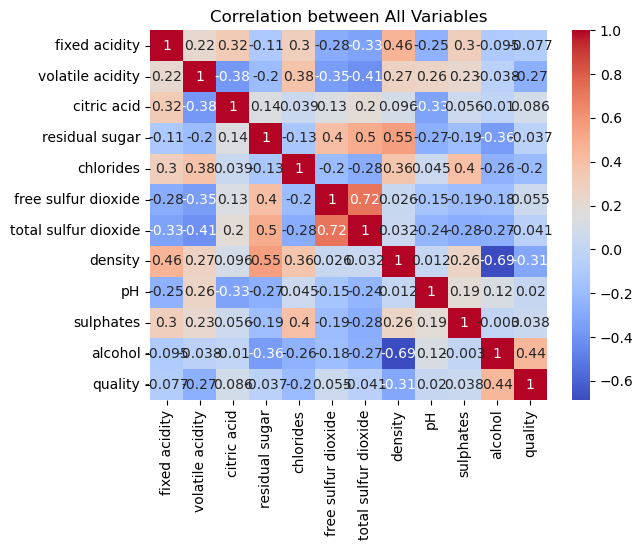

In [47]:
#Checking correlation between variables (close to 1 - positive correlation, close to -1 - negative correlation)
#Selecting all continous columns
cols = (
    ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", 
"total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
)
#Creating the matrix
correlation_matrix = all_wine[cols].corr()
print(correlation_matrix)

#Heatmap for visualization of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between All Variables")
plt.show()

#See stronger positive correlations between free sulfur dioxide and total sulfur dioxide, and alcohol and residual sugar
#See stronger negative correlations between alcohol and density

                      free sulfur dioxide  total sulfur dioxide
free sulfur dioxide              1.000000              0.720934
total sulfur dioxide             0.720934              1.000000


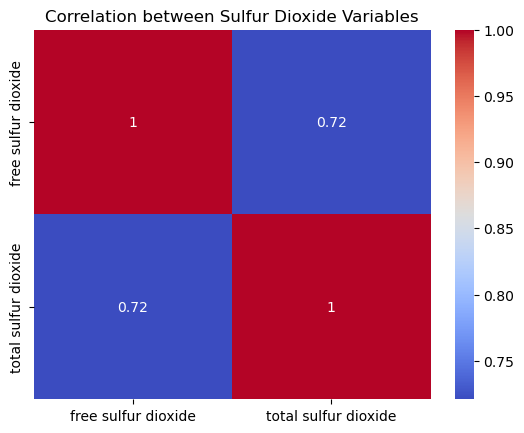

In [48]:
#Creating smaller correlation matrix based on patterns identified above

#Selecting columns of interest 
cols = ["free sulfur dioxide", "total sulfur dioxide"]
#Creating correlation matrix
correlation_matrix = all_wine[cols].corr()
print(correlation_matrix)

#Heatmap for visualization of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between Sulfur Dioxide Variables")
plt.show()
#Strong positive correlation between free and total sulfur dioxide

                 density   alcohol  residual sugar
density         1.000000 -0.686745        0.552517
alcohol        -0.686745  1.000000       -0.359415
residual sugar  0.552517 -0.359415        1.000000


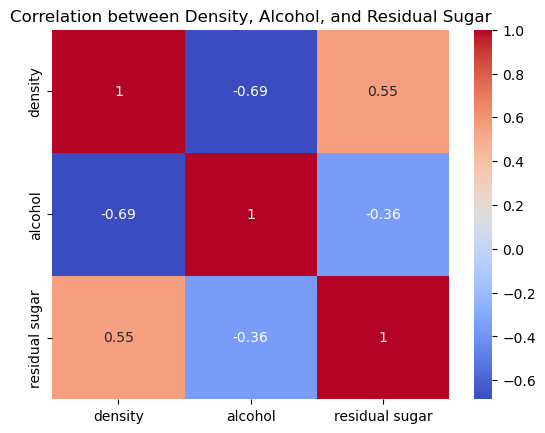

In [49]:
#Selecting columns of interest
cols = ["density", "alcohol", "residual sugar"]
#Creating correlation matrix
correlation_matrix = all_wine[cols].corr()
print(correlation_matrix)

#Heatmap for visualization of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between Density, Alcohol, and Residual Sugar")
plt.show()
#Relatively strong negative correlation between density and alcohol
#Somewhat positive correlation between desnity and residual sugar

In [55]:
#Summarizing the wine quality by the wine type
summary_quality = (
    all_wine.groupby("Wine Type")["quality"]
    .agg(["mean", "median", "min", "max", "count"])
    .reset_index()
)
print(summary_quality)

#Same median, and minimum, but white gets up to a max of 9 instead of 8

  Wine Type      mean  median  min  max  count
0       Red  5.636023     6.0    3    8   1599
1     White  5.877909     6.0    3    9   4898


/opt/anaconda3/lib/python3.12/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


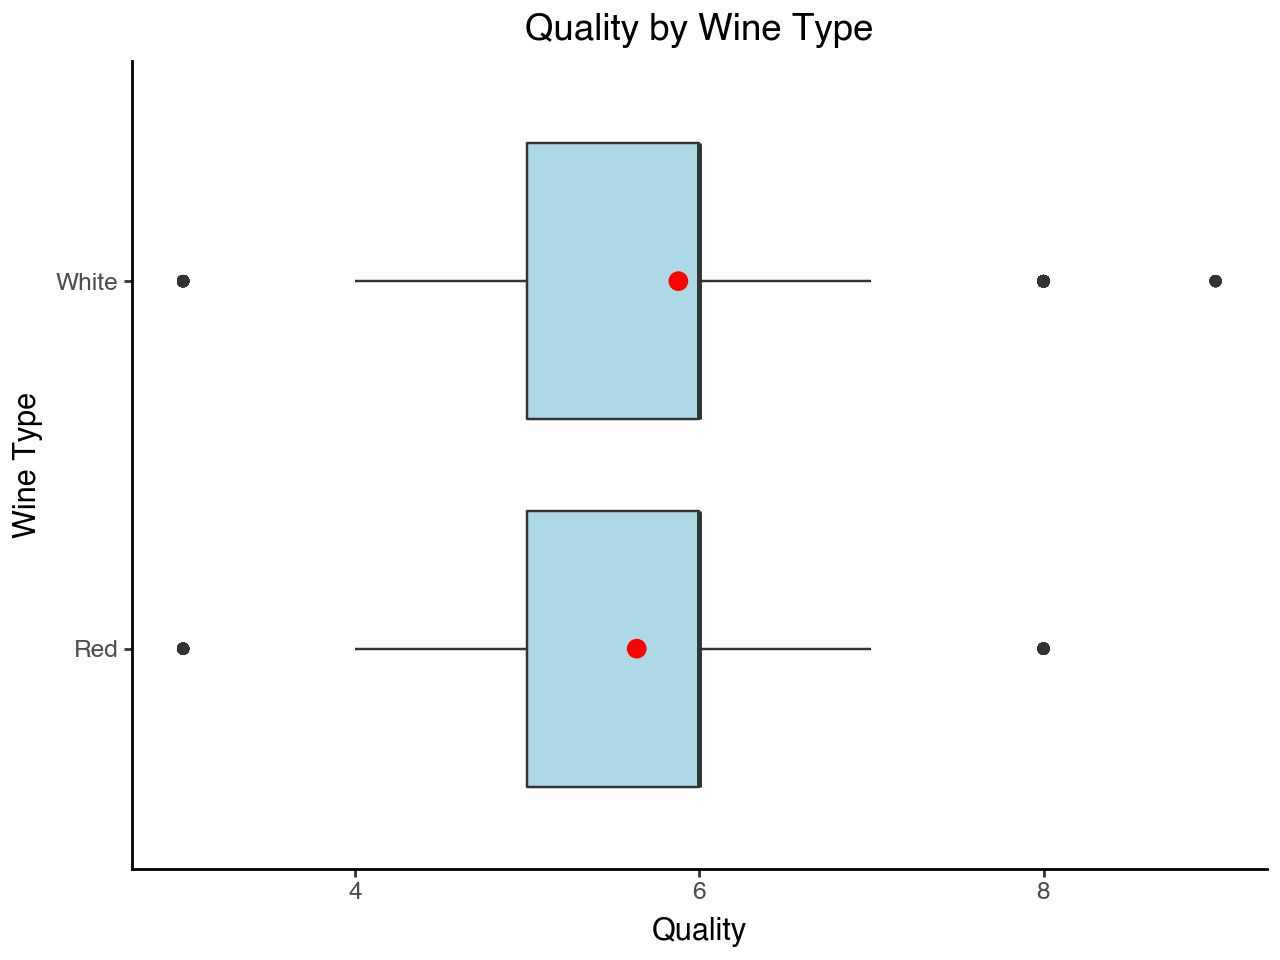

In [ ]:
#Plotting summary of quality by Wine Type as described above
p = (
    ggplot(all_wine, aes(x = "Wine Type", y = "quality")) + 
    geom_boxplot(fill="lightblue") + 
    labs(title = "Quality by Wine Type", y="Quality") + 
    stat_summary(fun_y=np.mean, geom = "point", shape="o", size = 3, color = "red", fill = "red") 
    + theme_classic() + 
    scale_fill_brewer(palette="Blues") + coord_flip()
    )
p.show()

In [ ]:
#Summarizing the residual sugar variable by the wine type
summary_sugar = (
    all_wine.groupby("Wine Type")["residual sugar"]
    .agg(["mean", "median", "min", "max", "count"])
    .reset_index()
)
print(summary_sugar)
#White wine has a higher residual sugar mean with a max of 65.8 (could have an outlier)

  Wine Type      mean  median  min   max  count
0       Red  2.538806     2.2  0.9  15.5   1599
1     White  6.391415     5.2  0.6  65.8   4898


/opt/anaconda3/lib/python3.12/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


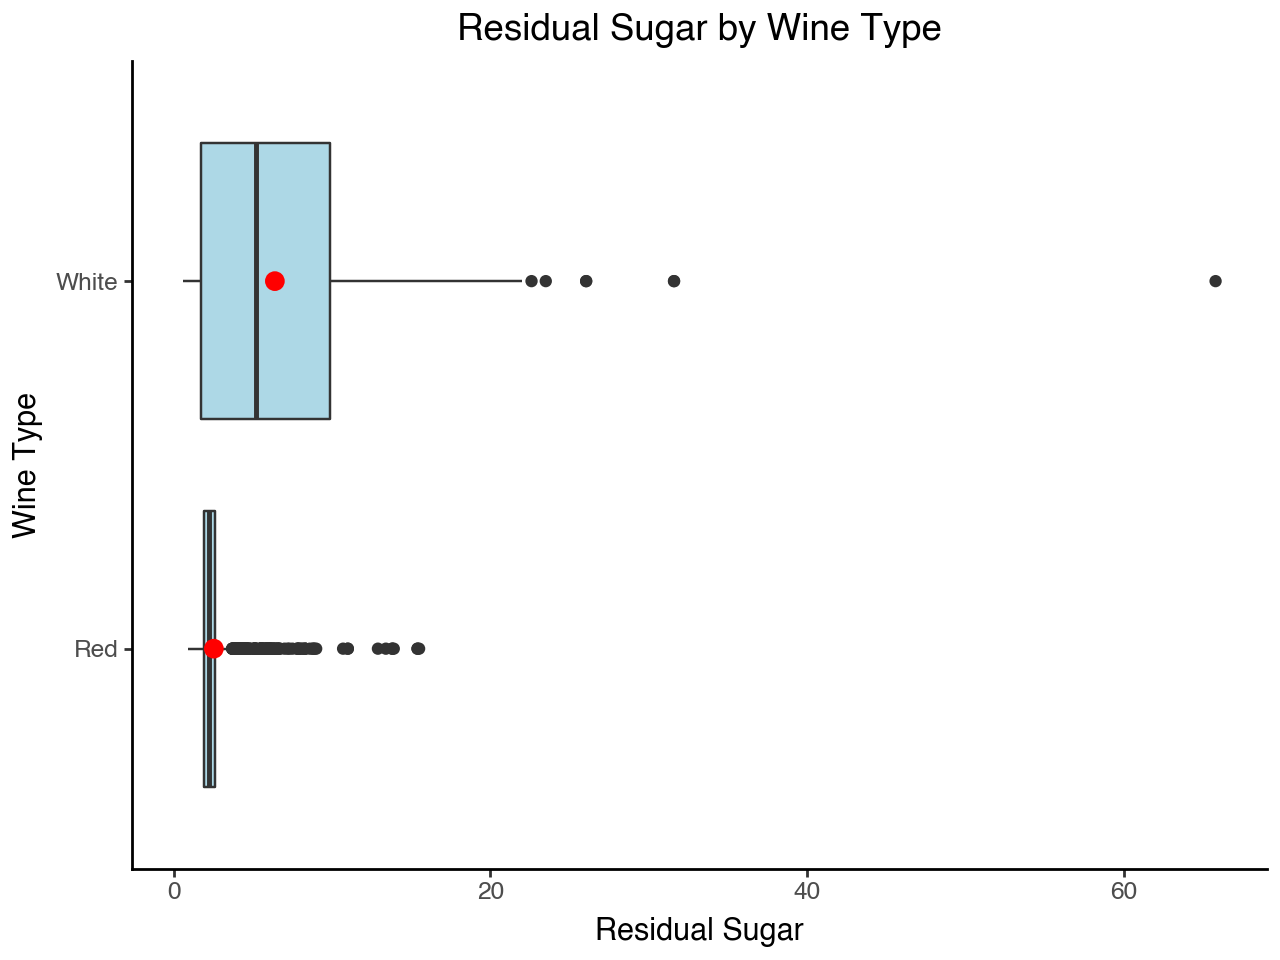

In [ ]:
#Checking for outliers in residual sugar
p = (
    ggplot(all_wine, aes(x = "Wine Type", y = "residual sugar")) + 
    geom_boxplot(fill="lightblue") + 
    labs(title = "Residual Sugar by Wine Type", y="Residual Sugar") + 
    stat_summary(fun_y=np.mean, geom = "point", shape="o", size = 3, color = "red", fill = "red") 
    + theme_classic() + 
    scale_fill_brewer(palette="Blues") + coord_flip()
    )
p.show()

#A few outliers in white wine

/opt/anaconda3/lib/python3.12/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


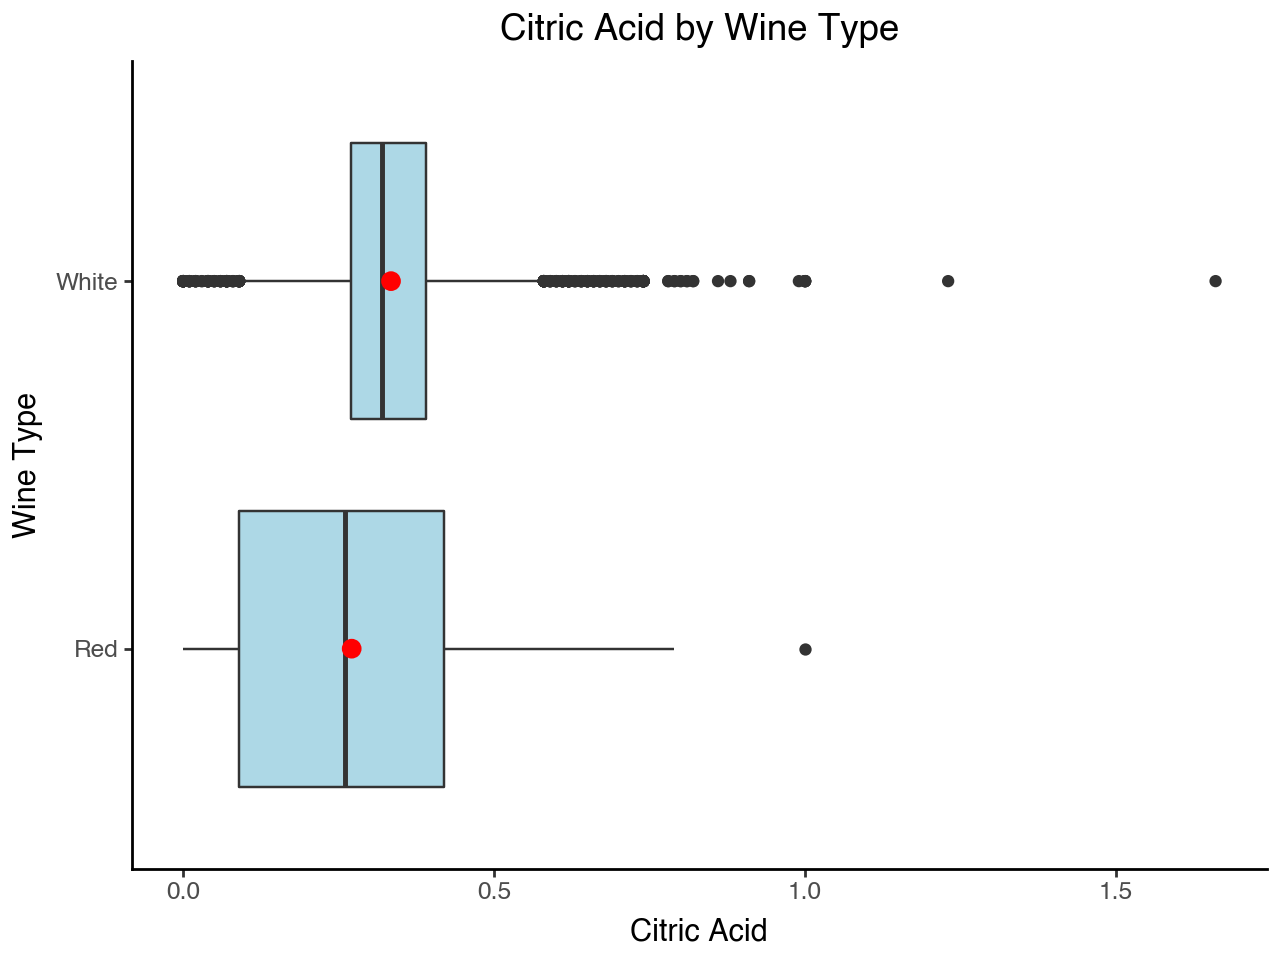

In [ ]:
#Checking for outliers in citric acid
p = (
    ggplot(all_wine, aes(x = "Wine Type", y = "citric acid")) + 
    geom_boxplot(fill="lightblue") + 
    labs(title = "Citric Acid by Wine Type", y="Citric Acid") + 
    stat_summary(fun_y=np.mean, geom = "point", shape="o", size = 3, color = "red", fill = "red") 
    + theme_classic() + 
    scale_fill_brewer(palette="Blues") + coord_flip()
    )
p.show()

#A few outliers for white wine and one for red wine

/opt/anaconda3/lib/python3.12/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


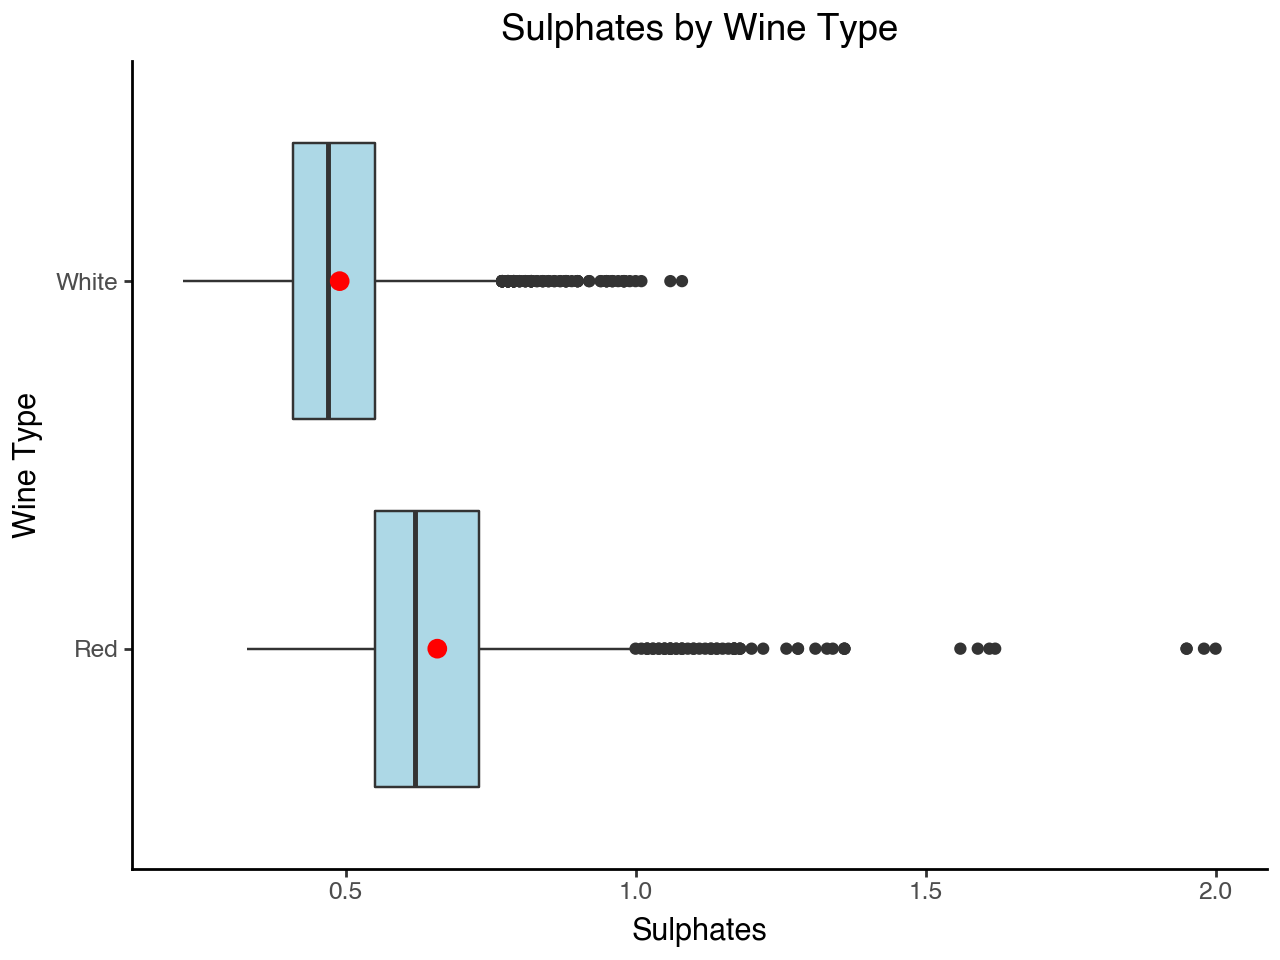

In [ ]:
#Checking for outliers in sulphates
p = (
    ggplot(all_wine, aes(x = "Wine Type", y = "sulphates")) + 
    geom_boxplot(fill="lightblue") + 
    labs(title = "Sulphates by Wine Type", y="Sulphates") + 
    stat_summary(fun_y=np.mean, geom = "point", shape="o", size = 3, color = "red", fill = "red") 
    + theme_classic() + 
    scale_fill_brewer(palette="Blues") + coord_flip()
    )
p.show()

#Red wine has more outliers in this column type

/opt/anaconda3/lib/python3.12/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


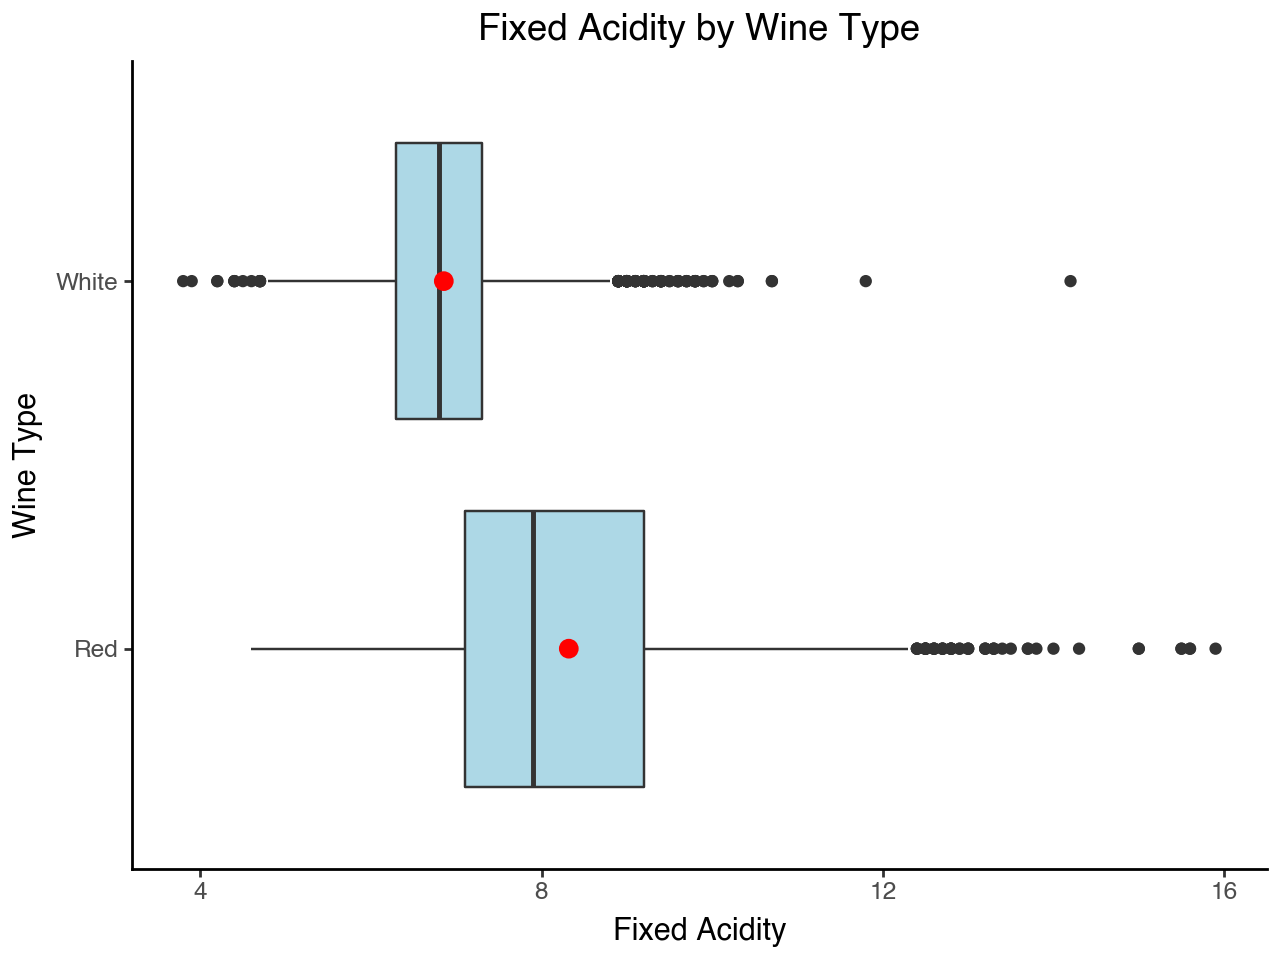

In [ ]:
#Checking for outliers in fixed acidity
p = (
    ggplot(all_wine, aes(x = "Wine Type", y = "fixed acidity")) + 
    geom_boxplot(fill="lightblue") + 
    labs(title = "Fixed Acidity by Wine Type", y="Fixed Acidity") + 
    stat_summary(fun_y=np.mean, geom = "point", shape="o", size = 3, color = "red", fill = "red") 
    + theme_classic() + 
    scale_fill_brewer(palette="Blues") + coord_flip()
    )
p.show()

#Outliers for oth white and red wine (more in red wine)